In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [3]:
def multi_hot_sequences(sequences, dimensions):
    results = np.zeros((len(sequences), dimensions))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [4]:
train_data = multi_hot_sequences(train_data, dimensions=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimensions=NUM_WORDS)

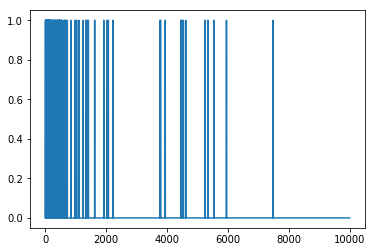

In [5]:
plt.plot(train_data[0])

## Demonstrate overfitting

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy']
                      )

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2
                                     )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.5038 - acc: 0.8067 - binary_crossentropy: 0.5038 - val_loss: 0.3474 - val_acc: 0.8730 - val_binary_crossentropy: 0.3474
Epoch 2/20
 - 3s - loss: 0.2562 - acc: 0.9092 - binary_crossentropy: 0.2562 - val_loss: 0.2839 - val_acc: 0.8874 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 3s - loss: 0.1832 - acc: 0.9368 - binary_crossentropy: 0.1832 - val_loss: 0.2873 - val_acc: 0.8849 - val_binary_crossentropy: 0.2873
Epoch 4/20
 - 3s - loss: 0.1447 - acc: 0.9517 - binary_crossentropy: 0.1447 - val_loss: 0.3113 - val_acc: 0.8782 - val_binary_crossentropy: 0.3113
Epoch 5/20
 - 3s - loss: 0.1189 - acc: 0.9614 - binary_crossentropy: 0.1189 - val_loss: 0.3370 - val_acc: 0.8744 - val_binary_crossentropy: 0.3370
Epoch 6/20
 - 3s - loss: 0.0972 - acc: 0.9708 - binary_crossentropy: 0.0972 - val_loss: 0.3676 - val_acc: 0.8707 - val_binary_crossentropy: 0.3676
Epoch 7/20
 - 3s - loss: 0.0798 - acc: 0.9778 - binary_crossentropy

## Build smaller model

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy']
                     )
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2
                                   )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5999 - acc: 0.7586 - binary_crossentropy: 0.5999 - val_loss: 0.4993 - val_acc: 0.8487 - val_binary_crossentropy: 0.4993
Epoch 2/20
 - 3s - loss: 0.4067 - acc: 0.8784 - binary_crossentropy: 0.4067 - val_loss: 0.3770 - val_acc: 0.8705 - val_binary_crossentropy: 0.3770
Epoch 3/20
 - 3s - loss: 0.3040 - acc: 0.9022 - binary_crossentropy: 0.3040 - val_loss: 0.3208 - val_acc: 0.8823 - val_binary_crossentropy: 0.3208
Epoch 4/20
 - 3s - loss: 0.2479 - acc: 0.9184 - binary_crossentropy: 0.2479 - val_loss: 0.2966 - val_acc: 0.8860 - val_binary_crossentropy: 0.2966
Epoch 5/20
 - 3s - loss: 0.2129 - acc: 0.9290 - binary_crossentropy: 0.2129 - val_loss: 0.2874 - val_acc: 0.8865 - val_binary_crossentropy: 0.2874
Epoch 6/20
 - 3s - loss: 0.1876 - acc: 0.9373 - binary_crossentropy: 0.1876 - val_loss: 0.2829 - val_acc: 0.8875 - val_binary_crossentropy: 0.2829
Epoch 7/20
 - 3s - loss: 0.1680 - acc: 0.9452 - binary_crossentropy:

## Bigger model

In [10]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy']
                    )
                    
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2
                                 )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.3512 - acc: 0.8517 - binary_crossentropy: 0.3512 - val_loss: 0.3055 - val_acc: 0.8752 - val_binary_crossentropy: 0.3055
Epoch 2/20
 - 9s - loss: 0.1353 - acc: 0.9509 - binary_crossentropy: 0.1353 - val_loss: 0.3625 - val_acc: 0.8619 - val_binary_crossentropy: 0.3625
Epoch 3/20
 - 9s - loss: 0.0406 - acc: 0.9892 - binary_crossentropy: 0.0406 - val_loss: 0.4330 - val_acc: 0.8696 - val_binary_crossentropy: 0.4330
Epoch 4/20
 - 9s - loss: 0.0066 - acc: 0.9991 - binary_crossentropy: 0.0066 - val_loss: 0.5986 - val_acc: 0.8657 - val_binary_crossentropy: 0.5986
Epoch 5/20
 - 10s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6703 - val_acc: 0.8714 - val_binary_crossentropy: 0.6703
Epoch 6/20
 - 9s - loss: 2.2956e-04 - acc: 1.0000 - binary_crossentropy: 2.2956e-04 - val_loss: 0.7105 - val_acc: 0.8716 - val_binary_crossentropy: 0.7105
Epoch 7/20
 - 10s - loss: 1.3811e-04 - acc: 1.0000 - binar

## Graph model performance

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                        label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

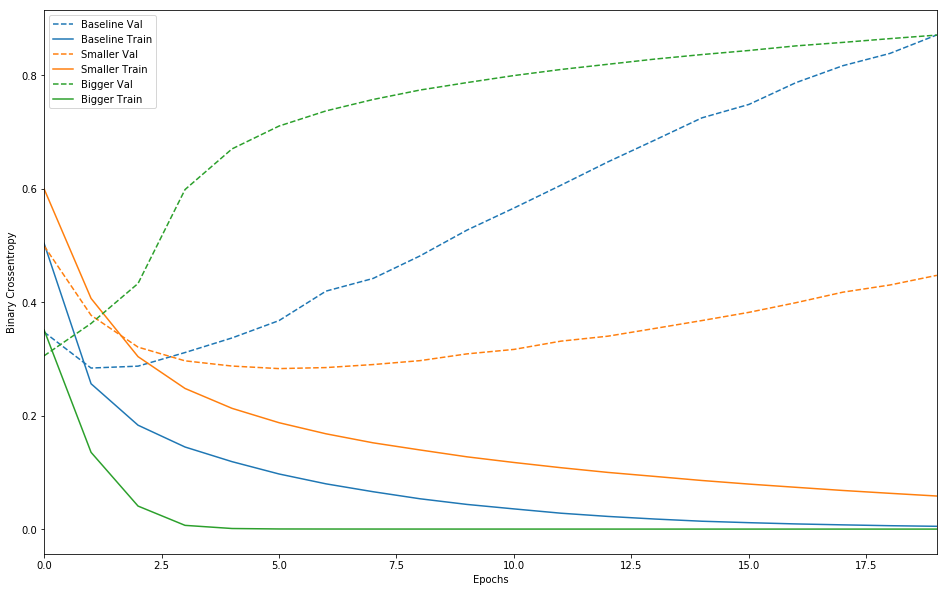

In [13]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Model with weight decay

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy']
                )

In [15]:
l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2
                               )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5384 - acc: 0.7967 - binary_crossentropy: 0.4970 - val_loss: 0.3889 - val_acc: 0.8762 - val_binary_crossentropy: 0.3465
Epoch 2/20
 - 4s - loss: 0.3119 - acc: 0.9079 - binary_crossentropy: 0.2647 - val_loss: 0.3380 - val_acc: 0.8870 - val_binary_crossentropy: 0.2873
Epoch 3/20
 - 4s - loss: 0.2600 - acc: 0.9281 - binary_crossentropy: 0.2067 - val_loss: 0.3389 - val_acc: 0.8854 - val_binary_crossentropy: 0.2837
Epoch 4/20
 - 4s - loss: 0.2341 - acc: 0.9386 - binary_crossentropy: 0.1774 - val_loss: 0.3510 - val_acc: 0.8825 - val_binary_crossentropy: 0.2934
Epoch 5/20
 - 4s - loss: 0.2208 - acc: 0.9446 - binary_crossentropy: 0.1615 - val_loss: 0.3624 - val_acc: 0.8802 - val_binary_crossentropy: 0.3023
Epoch 6/20
 - 4s - loss: 0.2077 - acc: 0.9507 - binary_crossentropy: 0.1469 - val_loss: 0.3776 - val_acc: 0.8758 - val_binary_crossentropy: 0.3165
Epoch 7/20
 - 4s - loss: 0.2006 - acc: 0.9526 - binary_crossentropy:

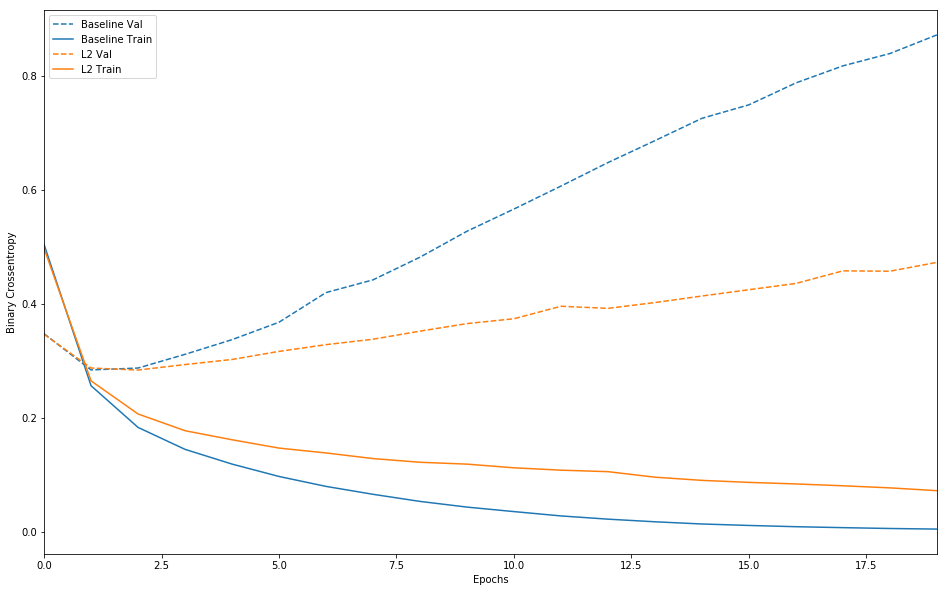

In [16]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

## Dropout

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy']
                 )

In [18]:
dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2
                                 )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6319 - acc: 0.6283 - binary_crossentropy: 0.6319 - val_loss: 0.4895 - val_acc: 0.8486 - val_binary_crossentropy: 0.4895
Epoch 2/20
 - 4s - loss: 0.4597 - acc: 0.8014 - binary_crossentropy: 0.4597 - val_loss: 0.3392 - val_acc: 0.8802 - val_binary_crossentropy: 0.3392
Epoch 3/20
 - 4s - loss: 0.3602 - acc: 0.8578 - binary_crossentropy: 0.3602 - val_loss: 0.2881 - val_acc: 0.8878 - val_binary_crossentropy: 0.2881
Epoch 4/20
 - 4s - loss: 0.2945 - acc: 0.8905 - binary_crossentropy: 0.2945 - val_loss: 0.2747 - val_acc: 0.8880 - val_binary_crossentropy: 0.2747
Epoch 5/20
 - 4s - loss: 0.2559 - acc: 0.9058 - binary_crossentropy: 0.2559 - val_loss: 0.2778 - val_acc: 0.8872 - val_binary_crossentropy: 0.2778
Epoch 6/20
 - 4s - loss: 0.2204 - acc: 0.9215 - binary_crossentropy: 0.2204 - val_loss: 0.2855 - val_acc: 0.8867 - val_binary_crossentropy: 0.2855
Epoch 7/20
 - 4s - loss: 0.2018 - acc: 0.9276 - binary_crossentropy:

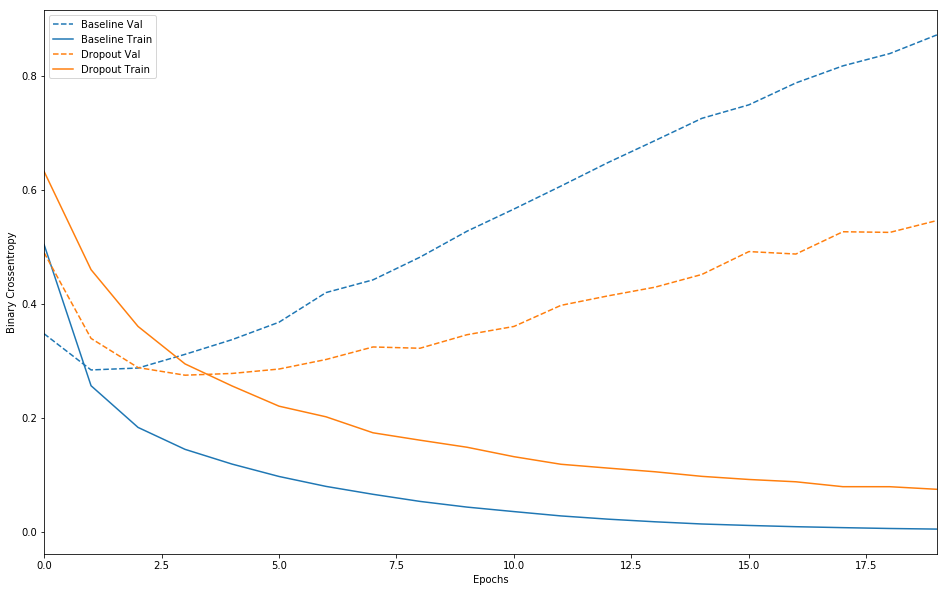

In [19]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])

## Combined model (Not from tutorial)

In [20]:
comb_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

comb_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'binary_crossentropy']
                  )

In [21]:
comb_model_history = comb_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2
                                   )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6697 - acc: 0.6288 - binary_crossentropy: 0.6315 - val_loss: 0.5343 - val_acc: 0.8498 - val_binary_crossentropy: 0.4989
Epoch 2/20
 - 4s - loss: 0.4970 - acc: 0.8053 - binary_crossentropy: 0.4597 - val_loss: 0.3852 - val_acc: 0.8814 - val_binary_crossentropy: 0.3450
Epoch 3/20
 - 4s - loss: 0.3950 - acc: 0.8688 - binary_crossentropy: 0.3516 - val_loss: 0.3377 - val_acc: 0.8880 - val_binary_crossentropy: 0.2910
Epoch 4/20
 - 4s - loss: 0.3384 - acc: 0.8995 - binary_crossentropy: 0.2890 - val_loss: 0.3281 - val_acc: 0.8894 - val_binary_crossentropy: 0.2761
Epoch 5/20
 - 4s - loss: 0.3049 - acc: 0.9134 - binary_crossentropy: 0.2507 - val_loss: 0.3339 - val_acc: 0.8870 - val_binary_crossentropy: 0.2777
Epoch 6/20
 - 4s - loss: 0.2783 - acc: 0.9277 - binary_crossentropy: 0.2202 - val_loss: 0.3419 - val_acc: 0.8854 - val_binary_crossentropy: 0.2820
Epoch 7/20
 - 4s - loss: 0.2632 - acc: 0.9345 - binary_crossentropy:

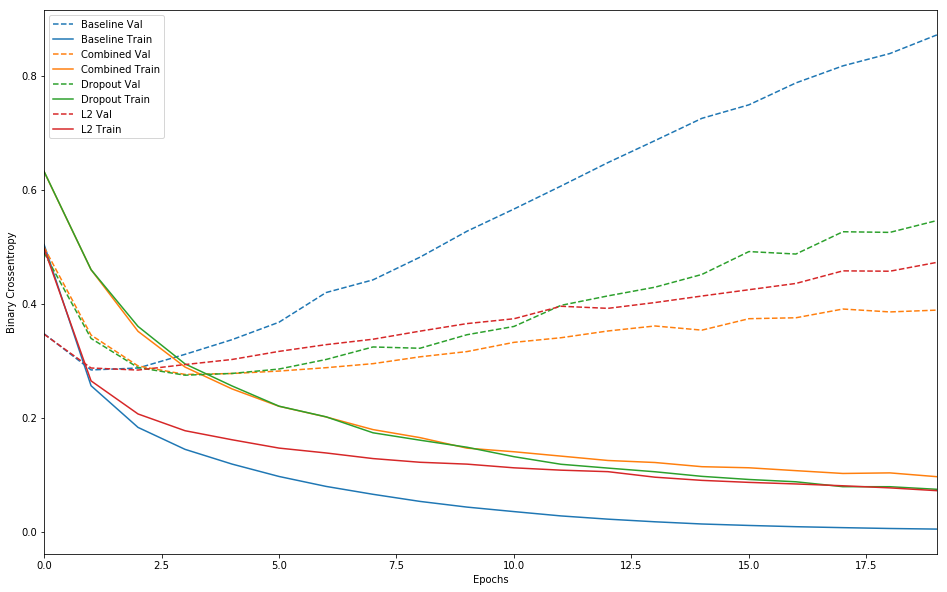

In [24]:
plot_history([('baseline', baseline_history), ('combined', comb_model_history), ('dropout', dpt_model_history), ('L2', l2_model_history)])